In [5]:
!pip install Tensorflow

In [6]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from  tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
import random as r

In [7]:
x_train = np.loadtxt("input.csv",delimiter=",")
y_train=np.loadtxt("labels.csv",delimiter=",")
x_test=np.loadtxt("input_test.csv",delimiter=",")
y_test = np.loadtxt("labels_test.csv",delimiter=",")

In [8]:
print("x_train.shape:",x_train.shape)
print("y_train.shape:",y_train.shape)
print("x_test.shape:",x_test.shape)
print("y_test.shape:",y_test.shape)
# 3000 is 100*100*3 (RGB)image

x_train.shape: (2000, 30000)
y_train.shape: (2000,)
x_test.shape: (400, 30000)
y_test.shape: (400,)


Reshape


In [9]:
x_train = x_train.reshape(len(x_train),100,100,3)
y_train = y_train.reshape(len(y_train),1)
x_test = x_test.reshape(len(x_test),100,100,3)
y_test = y_test.reshape(len(y_test),1)
x_train=x_train/255.0
x_test = x_test/255.0

In [10]:
print("x_train.shape:",x_train.shape)
print("y_train.shape:",y_train.shape)
print("x_test.shape:",x_test.shape)
print("y_test.shape:",y_test.shape)
# 3000 is 100*100*3 (RGB)image

x_train.shape: (2000, 100, 100, 3)
y_train.shape: (2000, 1)
x_test.shape: (400, 100, 100, 3)
y_test.shape: (400, 1)


In [11]:
x_train

array([[[[0.14509804, 0.15294118, 0.09803922],
         [0.10196078, 0.09411765, 0.03529412],
         [0.13333333, 0.09803922, 0.03921569],
         ...,
         [0.22352941, 0.17254902, 0.1372549 ],
         [0.23921569, 0.18431373, 0.14901961],
         [0.25490196, 0.2       , 0.16470588]],

        [[0.17647059, 0.16862745, 0.10980392],
         [0.10980392, 0.09803922, 0.03137255],
         [0.20392157, 0.15686275, 0.09411765],
         ...,
         [0.21176471, 0.16078431, 0.1254902 ],
         [0.22352941, 0.16862745, 0.13333333],
         [0.23921569, 0.18431373, 0.14901961]],

        [[0.20392157, 0.17647059, 0.10196078],
         [0.1254902 , 0.09411765, 0.01960784],
         [0.27058824, 0.21176471, 0.1372549 ],
         ...,
         [0.21176471, 0.15686275, 0.11372549],
         [0.21960784, 0.16470588, 0.12156863],
         [0.23137255, 0.17647059, 0.13333333]],

        ...,

        [[0.07843137, 0.15294118, 0.        ],
         [0.39607843, 0.49019608, 0.2627451 ]

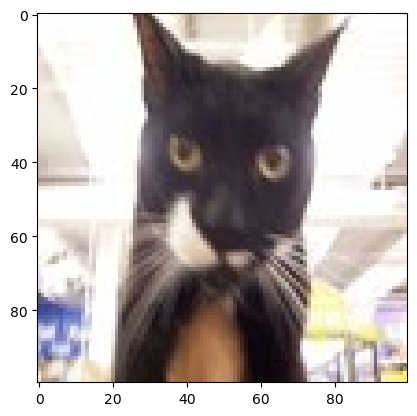

None


In [12]:
r_i = r.randint(0, len(x_train))
plt.imshow(x_train[r_i,:])
print(plt.show())

 # model

In [13]:
model = Sequential()

In [14]:
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])         

C:\Users\polam\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model.fit(x_train,y_train,epochs=5,batch_size = 64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.9759 - loss: 0.1022 
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.9860 - loss: 0.0713
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.9930 - loss: 0.0475
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.9938 - loss: 0.0400
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.9999 - loss: 0.0177


In [39]:
model.evaluate(x_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6158 - loss: 1.8967


[1.4690132141113281, 0.6775000095367432]

# making prediction 

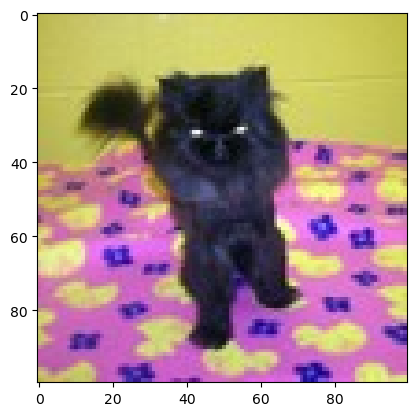

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
cat


In [43]:
idx = r.randint(0,len(y_test))
plt.imshow(x_test[idx,:])
plt.show()
y_prd =model.predict(x_test[idx,:].reshape(1,100,100,3))
y_prd=y_prd>0.5
if(y_prd==0):
    pred = "dog"
else:
    pred="cat"
print(pred)

In [58]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score

In [53]:
y_pred  = model.predict(x_test)
y_prd_binary = (y_pred > 0.5).astype(int)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


# Accuracy score

In [52]:
print(accuracy_score(y_prd_binary,y_test))

0.6775


# f1_score

In [51]:
print(f1_score(y_prd_binary,y_test))

0.7006960556844547


# precision score

In [59]:
print(precision_score(y_prd_binary,y_test))

0.755


# recall_score

In [60]:
print(recall_score(y_prd_binary,y_test))

0.6536796536796536
